In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('classic')

In [2]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

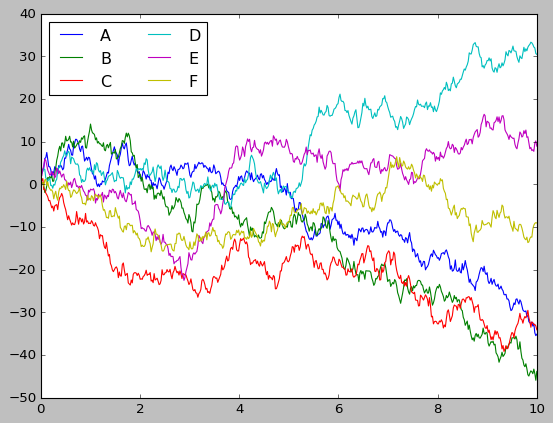

In [3]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [4]:
import seaborn as sns

sns.set()

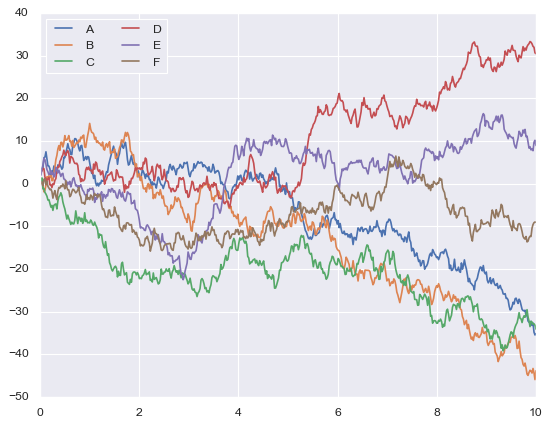

In [5]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [6]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data

array([[-2.47143561, -0.07453205],
       [-3.17791059, -0.55544333],
       [ 2.60185586,  1.01063213],
       ...,
       [-2.80473687, -1.2211722 ],
       [-2.48775352, -0.23223175],
       [ 0.45051898, -0.6291202 ]])

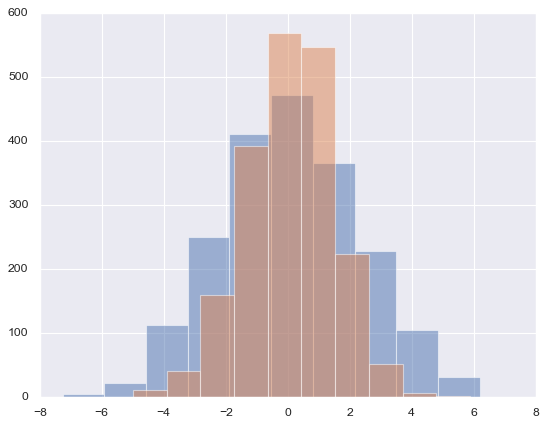

In [7]:
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

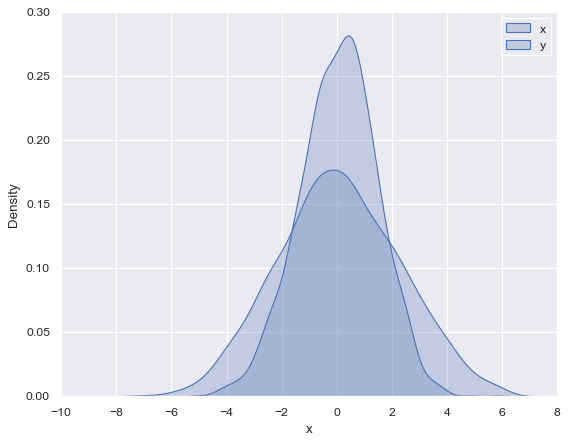

In [8]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)
    plt.legend('xy');

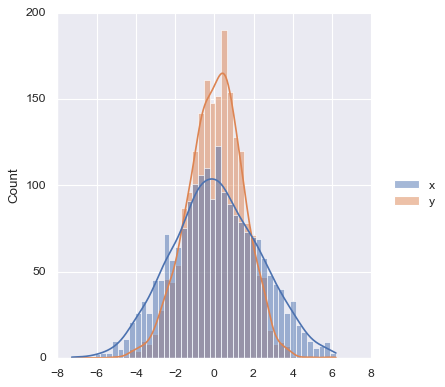

In [9]:
sns.displot(data, kde=True);

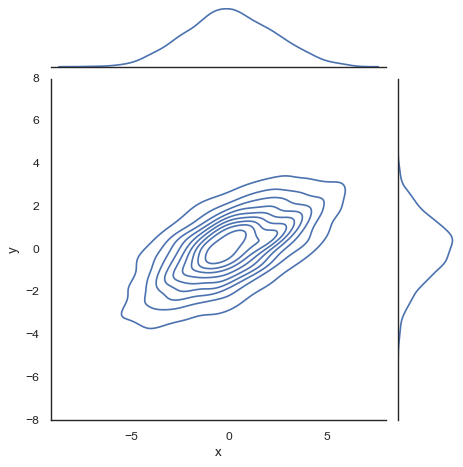

In [10]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='kde');

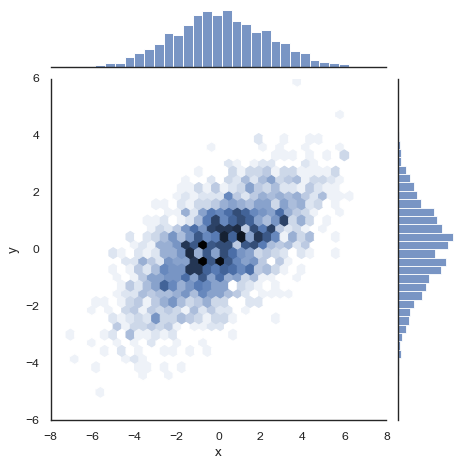

In [11]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='hex');

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


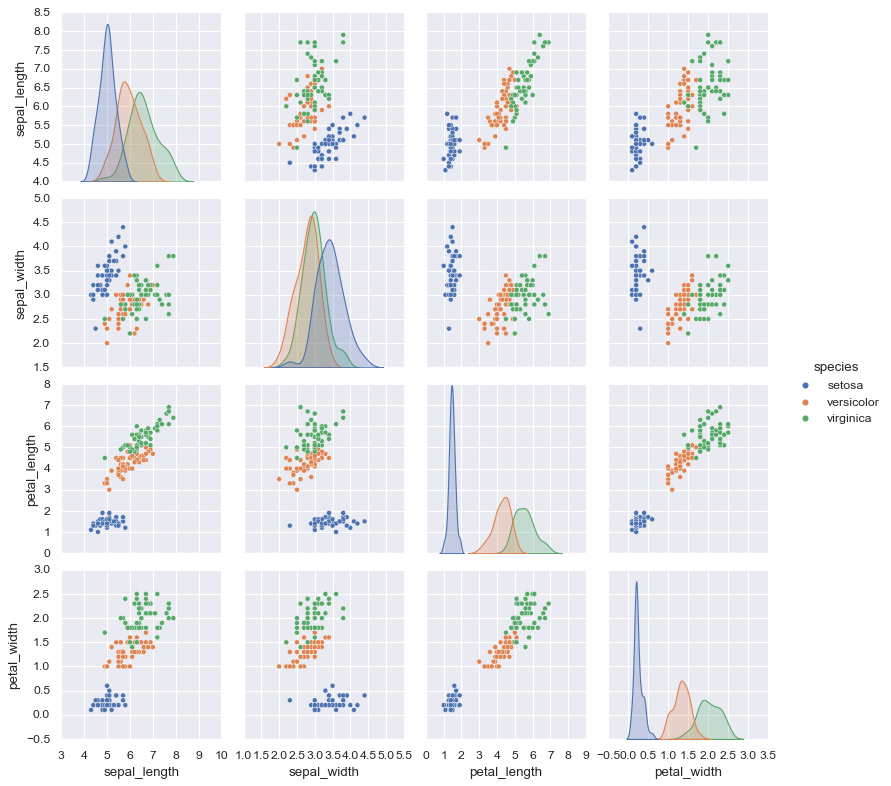

In [13]:
sns.pairplot(iris, hue='species', height=2.5);

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


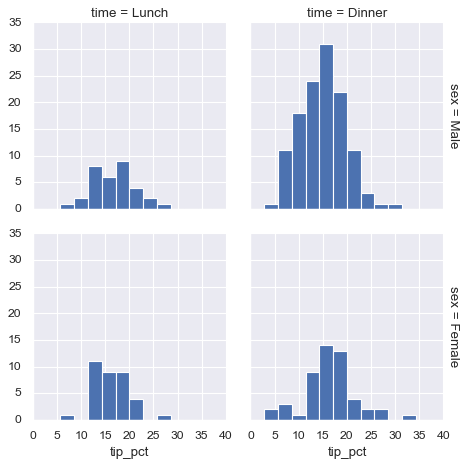

In [15]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

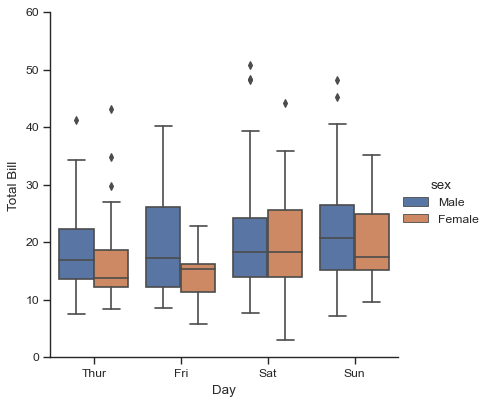

In [16]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

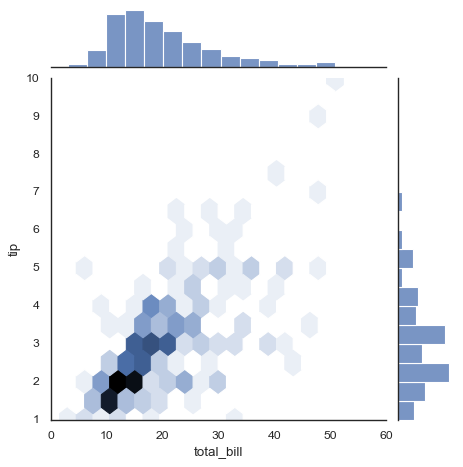

In [17]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

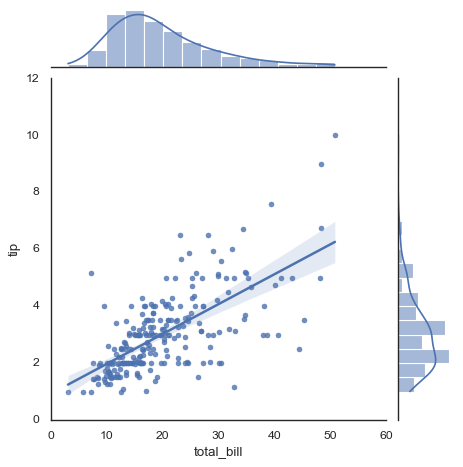

In [18]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg')

In [19]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


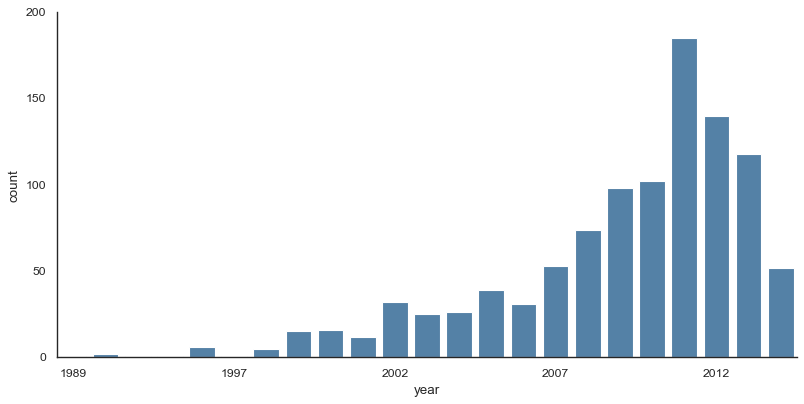

In [20]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2, kind="count", color="steelblue")
    g.set_xticklabels(step=5)

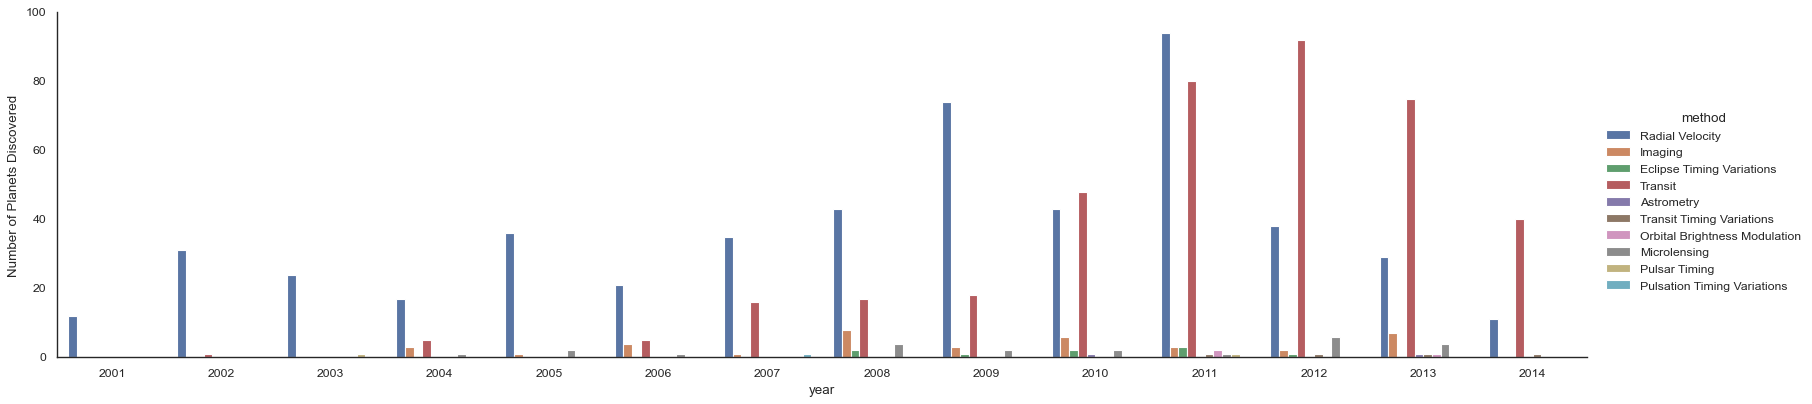

In [21]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4, kind="count", hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

In [22]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0  1217k      0 --:--:-- --:--:-- --:--:-- 1216k


In [71]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [72]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [64]:
pd.to_timedelta?

In [75]:
data['split'] = pd.to_timedelta(data.split)
data['final'] = pd.to_timedelta(data.final)
data

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59
...,...,...,...,...
37245,18,M,0 days 04:24:24,0 days 09:32:57
37246,36,M,0 days 04:35:43,0 days 09:33:28
37247,51,M,0 days 04:22:35,0 days 09:33:40
37248,55,W,0 days 04:58:06,0 days 10:00:40


In [76]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [79]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


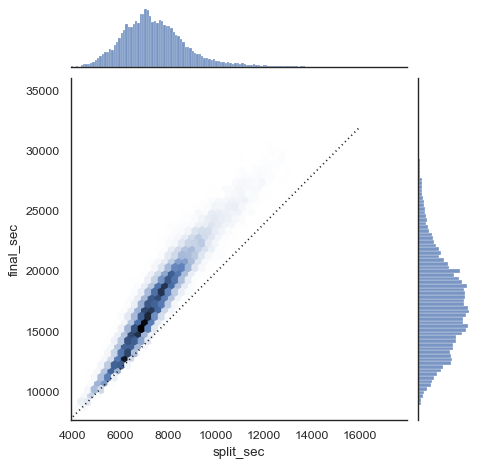

In [80]:
with sns.axes_style('white'):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

In [81]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


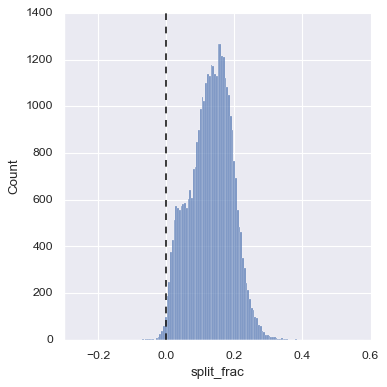

In [85]:
sns.displot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [86]:
sum(data.split_frac < 0)

251

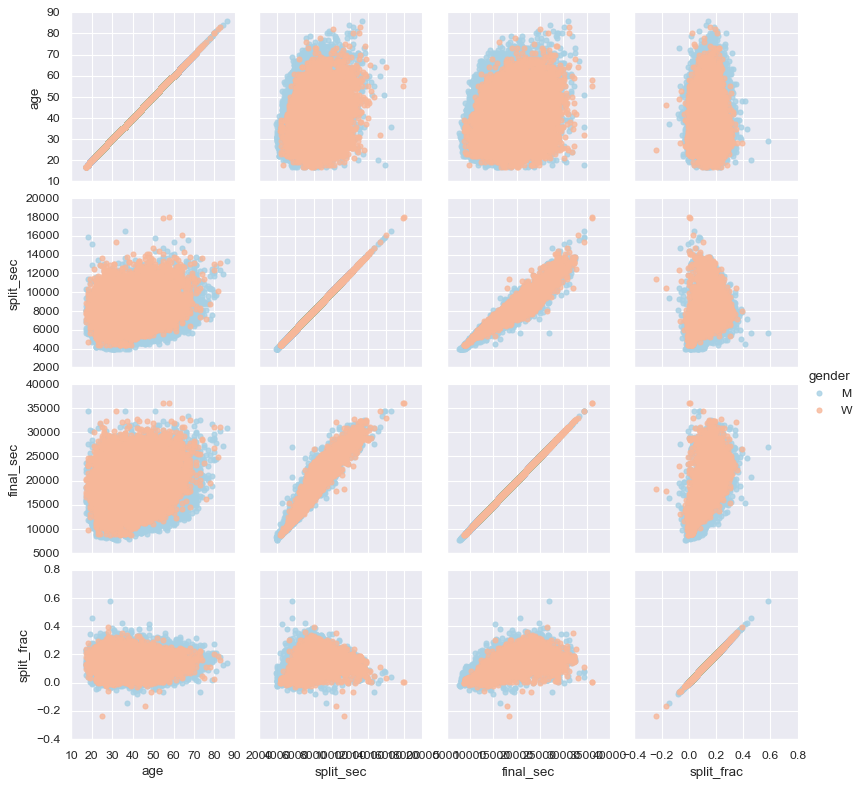

In [87]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

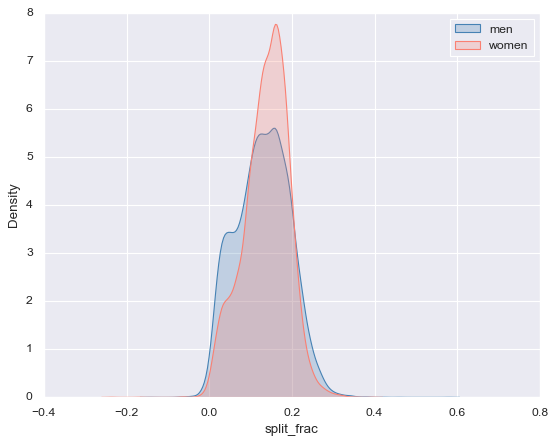

In [106]:
sns.kdeplot(data.split_frac[data.gender == 'M'], label='men', shade=True, color='steelblue')
sns.kdeplot(data.split_frac[data.gender == 'W'], label='women', shade=True, color='salmon')
plt.xlabel('split_frac')
plt.legend();

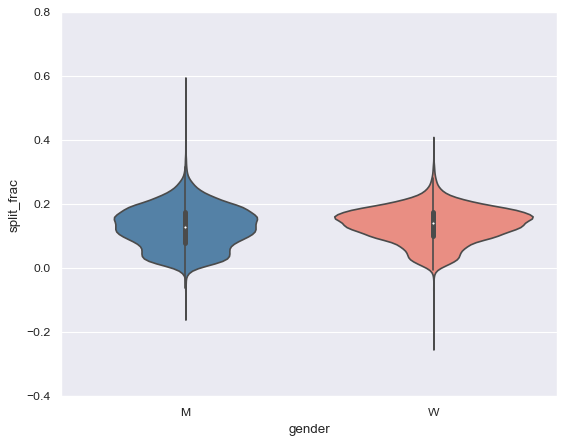

In [108]:
sns.violinplot(x="gender", y="split_frac", data=data, palette=["steelblue", "salmon"]);

In [109]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


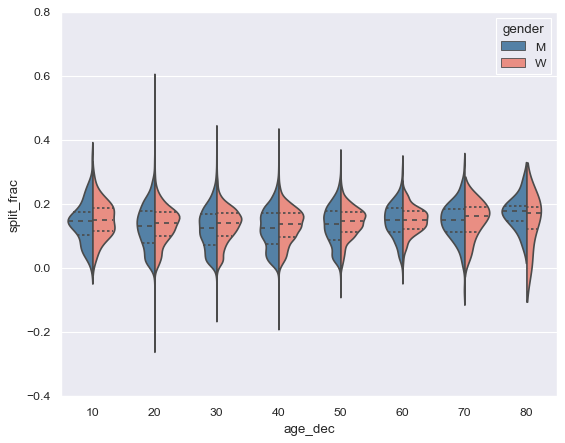

In [112]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile", palette=["steelblue", "salmon"]);

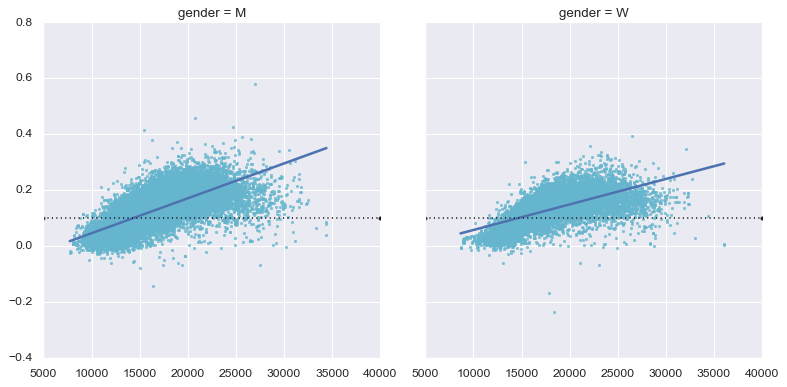

In [113]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
               markers='.', scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");